## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.91, 0.95, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    for nesterov in [True, False]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.6f, nesterov = %s" % (mm, str(nesterov)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mm)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s%s" % (str(mm), '_nes' if nesterov else '')
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.910000, nesterov = True
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instruc

50000/50000 [==============================] - 3s 65us/step - loss: 1.6713 - acc: 0.4172 - val_loss: 1.6748 - val_acc: 0.4165
Epoch 49/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6675 - acc: 0.4195 - val_loss: 1.6711 - val_acc: 0.4157
Epoch 50/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6641 - acc: 0.4203 - val_loss: 1.6674 - val_acc: 0.4173
Experiment with MOMENTUM = 0.910000, nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (D

50000/50000 [==============================] - 3s 62us/step - loss: 1.6762 - acc: 0.4158 - val_loss: 1.6799 - val_acc: 0.4173
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6724 - acc: 0.4171 - val_loss: 1.6748 - val_acc: 0.4197
Experiment with MOMENTUM = 0.950000, nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)         

50000/50000 [==============================] - 3s 65us/step - loss: 1.5569 - acc: 0.4557 - val_loss: 1.5718 - val_acc: 0.4490
Experiment with MOMENTUM = 0.950000, nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________

50000/50000 [==============================] - 4s 70us/step - loss: 2.1737 - acc: 0.2089 - val_loss: 2.0329 - val_acc: 0.2702
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9503 - acc: 0.3066 - val_loss: 1.8885 - val_acc: 0.3377
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8524 - acc: 0.3493 - val_loss: 1.8242 - val_acc: 0.3665
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7976 - acc: 0.3699 - val_loss: 1.7766 - val_acc: 0.3822
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7584 - acc: 0.3829 - val_loss: 1.7412 - val_acc: 0.3942
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7241 - acc: 0.3958 - val_loss: 1.7081 - val_acc: 0.4098
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6941 - acc: 0.4072 - val_loss: 1.6819 - val_acc: 0.4183
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 3s 62us/step - loss: 1.9948 - acc: 0.2823 - val_loss: 1.9347 - val_acc: 0.3061
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8930 - acc: 0.3273 - val_loss: 1.8601 - val_acc: 0.3430
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8302 - acc: 0.3579 - val_loss: 1.8066 - val_acc: 0.3623
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7881 - acc: 0.3715 - val_loss: 1.7722 - val_acc: 0.3694
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7501 - acc: 0.3822 - val_loss: 1.7282 - val_acc: 0.3889
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7148 - acc: 0.3981 - val_loss: 1.7003 - val_acc: 0.3999
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6853 - acc: 0.4108 - val_loss: 1.6743 - val_acc: 0.4108
Epoch 9/50
50000/50000 [============================

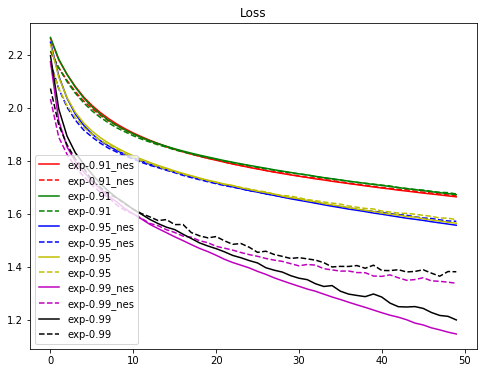

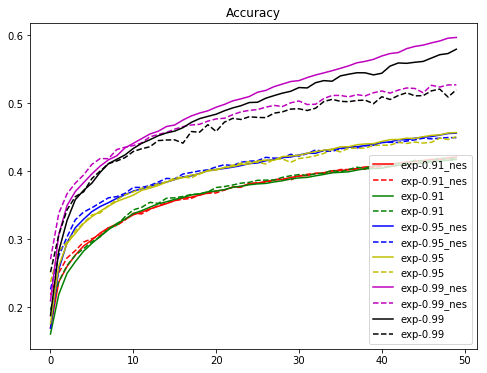

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()